In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('dataset/Thyroid_Dataset_Resampled.csv')

# EDA

In [3]:
df.head()

,Age,Gender,Pregnancy,Family_History_of_Thyroid,Goiter,Fatigue,Weight_Change,Hair_Loss,Heart_Rate_Changes,Sensitivity_to_Cold_or_Heat,Increased_Sweating,Muscle_Weakness,Constipation_or_More_Bowel_Movements,Depression_or_Anxiety,Difficulty_Concentrating_or_Memory_Problems,Dry_or_Itchy_Skin,Thyroid_Risk_Level
0,81,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,2
1,18,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1
2,87,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,2
3,27,1,0,0,1,0,1,1,1,1,1,0,0,1,1,0,2
4,49,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1


In [4]:
df.shape

(10506, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Age                                          10506 non-null  int64
 1   Gender                                       10506 non-null  int64
 2   Pregnancy                                    10506 non-null  int64
 3   Family_History_of_Thyroid                    10506 non-null  int64
 4   Goiter                                       10506 non-null  int64
 5   Fatigue                                      10506 non-null  int64
 6   Weight_Change                                10506 non-null  int64
 7   Hair_Loss                                    10506 non-null  int64
 8   Heart_Rate_Changes                           10506 non-null  int64
 9   Sensitivity_to_Cold_or_Heat                  10506 non-null  int64
 10  Increased_Sweating    

# Checking Class Balance

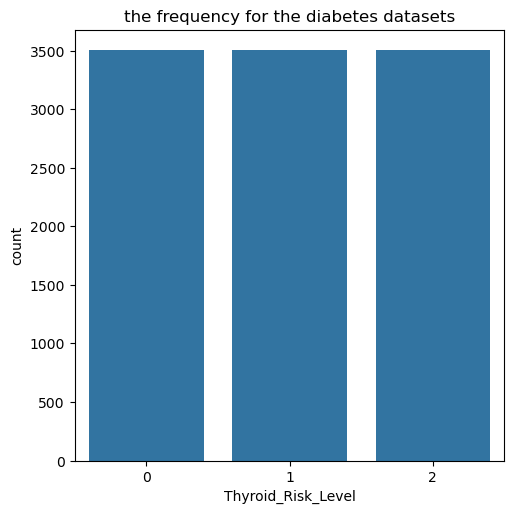

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Thyroid_Risk_Level')
plt.title('the frequency for the diabetes datasets')
plt.tight_layout(pad=0.2)
plt.show()

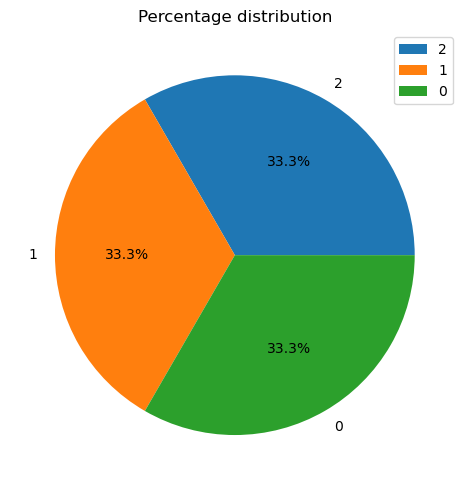

In [7]:
plt.figure(figsize=(5, 5))
counts = df['Thyroid_Risk_Level'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.1f%%')
plt.title('Percentage distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# checking outliers in age column

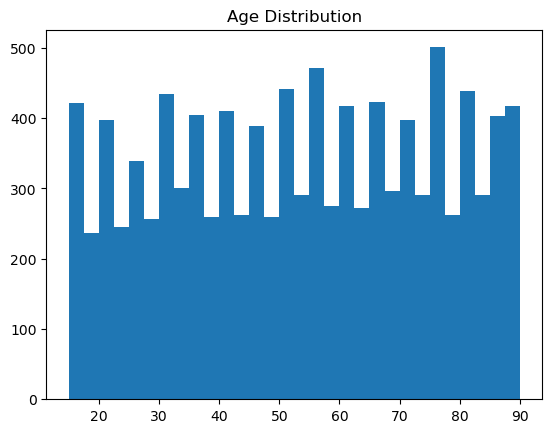

In [8]:
plt.hist(df['Age'], bins=30)
plt.title("Age Distribution")
plt.show()

In [9]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['Age'] < lower) | (df['Age'] > upper)]
print("Number of outliers:", len(outliers))

Number of outliers: 0


NO OUTLIERS

# minmax scaling age

In [10]:
age = ["Age"]  

for x in age:
    min_val = df[x].min()
    max_val = df[x].max()
    df[x] = (df[x] - min_val) / (max_val - min_val)

# One-hot Encoding the gender

In [15]:
df = pd.get_dummies(df, columns=["Gender"], prefix="Gender")

In [16]:
df.head()

,Age,Pregnancy,Family_History_of_Thyroid,Goiter,Fatigue,Weight_Change,Hair_Loss,Heart_Rate_Changes,Sensitivity_to_Cold_or_Heat,Increased_Sweating,Muscle_Weakness,Constipation_or_More_Bowel_Movements,Depression_or_Anxiety,Difficulty_Concentrating_or_Memory_Problems,Dry_or_Itchy_Skin,Thyroid_Risk_Level,Gender_0,Gender_1
0,0.880000,0,1,1,1,0,0,1,1,0,1,1,0,1,0,2,False,True
1,0.040000,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,False,True
2,0.960000,0,1,1,0,1,1,1,0,0,1,1,1,0,1,2,True,False
3,0.160000,0,0,1,0,1,1,1,1,1,0,0,1,1,0,2,False,True
4,0.453333,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,True,False


In [ ]:
df[["Gender_0", "Gender_1"]] = df[["Gender_0", "Gender_1"]].replace({True: 1, False: 0})

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_12376\4140512433.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[["Gender_0", "Gender_1"]] = df[["Gender_0", "Gender_1"]].replace({True: 1, False: 0})


In [25]:
df.head()

,Age,Pregnancy,Family_History_of_Thyroid,Goiter,Fatigue,Weight_Change,Hair_Loss,Heart_Rate_Changes,Sensitivity_to_Cold_or_Heat,Increased_Sweating,Muscle_Weakness,Constipation_or_More_Bowel_Movements,Depression_or_Anxiety,Difficulty_Concentrating_or_Memory_Problems,Dry_or_Itchy_Skin,Thyroid_Risk_Level,Gender_0,Gender_1
0,0.880000,0,1,1,1,0,0,1,1,0,1,1,0,1,0,2,0,1
1,0.040000,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,1
2,0.960000,0,1,1,0,1,1,1,0,0,1,1,1,0,1,2,1,0
3,0.160000,0,0,1,0,1,1,1,1,1,0,0,1,1,0,2,0,1
4,0.453333,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          10506 non-null  float64
 1   Pregnancy                                    10506 non-null  int64  
 2   Family_History_of_Thyroid                    10506 non-null  int64  
 3   Goiter                                       10506 non-null  int64  
 4   Fatigue                                      10506 non-null  int64  
 5   Weight_Change                                10506 non-null  int64  
 6   Hair_Loss                                    10506 non-null  int64  
 7   Heart_Rate_Changes                           10506 non-null  int64  
 8   Sensitivity_to_Cold_or_Heat                  10506 non-null  int64  
 9   Increased_Sweating                           10506 non-null  int64  
 10

In [27]:
df.to_csv("dataset/Thyroid_Dataset_Scaled.csv", index=False)